### Course 2: Python Project 4

### <font color='red'> Part 1

### EDA & Data Preprocessing on Google App Store Rating Dataset.

###  <font color ='black'> Domain:  Mobile device apps

### Content:
The Play Store apps data has enormous potential to drive app-making businesses to success. However, many
apps are being developed every single day and only a few of them become profitable. It is important for
developers to be able to predict the success of their app and incorporate features which makes an app
successful. Before any such predictive-study can be done, it is necessary to do EDA and data-preprocessing on
the apps data available for google app store applications. From the collected apps data and user ratings from
the app stores, let's try to extract insightful information.

### Objective:
The Goal is to explore the data and pre-process it for future use in any predictive analytics study.


#### Data set Information:
Web scraped data of 10k Play Store apps for analyzing the Android market. Each app (row) has values for
category, rating, size, and more

### Attribute Information:

1. App - Application name
2. Category - Category the app belongs to.
3. Rating - Overall user rating of the app
4. Size - Size of the app
5. Installs - Number of user reviews for the app
6. Type - Paid or Free
7. Price - Price of the app
8. Content - Rating Age group the app is targeted at - children/Mature 21+ /Adult
9. Genres - An app can belong to multiple genres (apart from its main category). For eg. a
10. Last - Updated Date when the app was last updated on play store.
11. Current - Ver Current version of the app available on play store.
12. Android - Ver Min required Android Version.


<font size=4> Q1)Import required libraries and read the dataset.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(threshold=200)
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Apps_data+(1).csv')
df#here we are reading the dataset using pd.read_csv and storing it in a varibale name 'df'

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
df_copy=df.copy
# we are taking the copy of the given data for safety

<font size=4> Q2)Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [4]:
df.sample(10)
# sample is used to get random 10 rows 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8866,Dt Tracking,AUTO_AND_VEHICLES,4.0,4,24M,100+,Free,0,Everyone,Auto & Vehicles,"October 28, 2016",0.20,4.0 and up
4148,Granny,GAME,4.5,1128805,59M,"50,000,000+",Free,0,Teen,Arcade,"May 29, 2018",1.4.0.1,4.0 and up
6166,Auto Background Changer,PHOTOGRAPHY,4.0,35188,6.2M,"1,000,000+",Free,0,Everyone,Photography,"February 22, 2018",1.0.11,3.2 and up
6459,BatControl Pro,TOOLS,4.9,83,3.1M,500+,Paid,$3.99,Everyone,Tools,"June 1, 2018",2.0.0,5.0 and up
9553,El Laberinto del Demonio 2,FAMILY,4.1,3654,25M,"100,000+",Free,0,Teen,Puzzle,"April 14, 2017",1.0.1,4.0 and up
10527,FK Željezničar,SPORTS,4.9,1420,20M,"10,000+",Free,0,Everyone,Sports,"July 12, 2018",2.5.0,4.2 and up
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,NaN,0,2.1M,0+,Free,0,Everyone,News & Magazines,"July 7, 2018",1.1,4.4 and up
5770,AirWatch Inbox,BUSINESS,2.7,8346,Varies with device,"1,000,000+",Free,0,Everyone,Business,"September 20, 2017",Varies with device,4.0 and up
10798,Word Search Tab 1 FR,FAMILY,NaN,0,1020k,50+,Paid,$1.04,Everyone,Puzzle,"February 6, 2012",1.1,3.0 and up
2732,"Groupon - Shop Deals, Discounts & Coupons",SHOPPING,4.6,1370749,Varies with device,"50,000,000+",Free,0,Teen,Shopping,"August 3, 2018",Varies with device,Varies with device


In [5]:
df.head(10)
#head is used to get first 10 rows 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [6]:
df.tail(10)
# tail is used to get last 10 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
df.shape
#shape is used to see number of rows and columns

(10841, 13)

In [8]:
df.dtypes
#dtypes tells up datatype of each column

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [9]:
df.info()
#info checks the datatype of every columns,types of the data,range of the data  and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<font size=4> Q3)Check summary statistics of the dataset. List out the columns that need to be worked upon for model
building.

In [10]:
df.describe()
#describe() is used to get summary statistics like mean,median and mode...etc

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [11]:
df.skew()

Rating    0.595637
dtype: float64

In [12]:
df.columns
#gives us the name of the columns in the dataset

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

<font size=4> Q4)Check if there are any duplicate records in the dataset? if any drop them.


In [13]:
df.duplicated().sum()
#gives the sum of duplicated values

483

In [14]:
df.drop_duplicates(inplace=True)
#droping the duplicates value

In [15]:
df.duplicated().sum()
#checking whether the duplicate dropped

0

<font size=4> Q5)Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [16]:
df['Category'].unique()
#checking the unique values from column category

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [17]:
df=df[df['Category']!='1.9']
#removing the invalid category name '1.9' from the data 

In [18]:
df['Category'].unique()
#checking whether the above step runned successfully

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

<font size=4> Q6)Check if there are missing values present in the column Rating, If any? drop them and and create a new
column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [19]:
df['Rating'].isnull().sum()
#checking for missimg values

1465

In [20]:
df.dropna(subset=['Rating'],axis=0,inplace=True)
#droping the null values

In [21]:
df['Rating'].isnull().sum()
#checking whether the above step runned successfully

0

In [22]:
df['Rating_category']=df['Rating'].apply(lambda x:'High' if x>3.5 else 'Low')
#creating a new column 'Rating_category' from column name 'Rating'

In [23]:
df['Rating_category']
#checking whether the above step runned successfully

0        High
1        High
2        High
3        High
4        High
         ... 
10834    High
10836    High
10837    High
10839    High
10840    High
Name: Rating_category, Length: 8892, dtype: object

<font size=4> Q7)Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [24]:
df['Rating_category'].value_counts()

High    8012
Low      880
Name: Rating_category, dtype: int64

<Axes: >

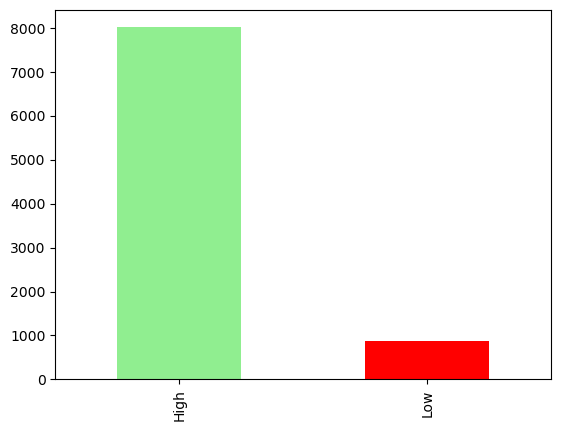

In [25]:
df['Rating_category'].value_counts().plot(kind='bar',color=['lightgreen','red'])

### Inference:


<font size=4> Q8)Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and
handle the outliers using a transformation approach.(Hint: Use log transformation)

In [26]:
# creating a function to chcek numeric values and garbage value
def checknumber(x):
    if x.isnumeric():
        return x
    else:
        print(x)

In [27]:
#checking the numeric and garbage values
df['Reviews'].apply(checknumber)

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8892, dtype: object

In [28]:
df['Reviews']=df['Reviews'].astype(int)
#reviews column is changed from object to int

In [29]:
df['Reviews']
#checking whether the above step runned successfully

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8892, dtype: int32

<Axes: ylabel='Reviews'>

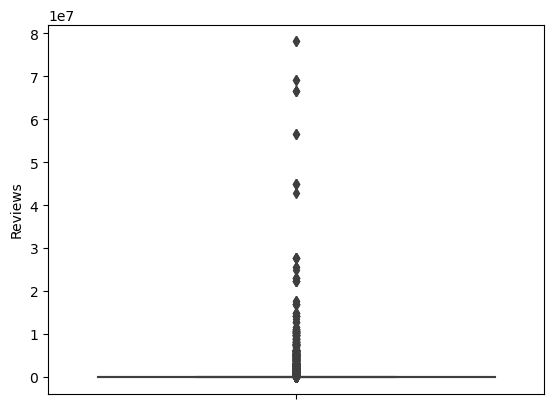

In [30]:
sns.boxplot(y=df['Reviews'])
#using boxplot we can find the outliers

In [31]:
df['Reviews']=np.log1p(df['Reviews'])
# In the above boxplot we can find outliers, so we treating outliers using log transform

<Axes: ylabel='Reviews'>

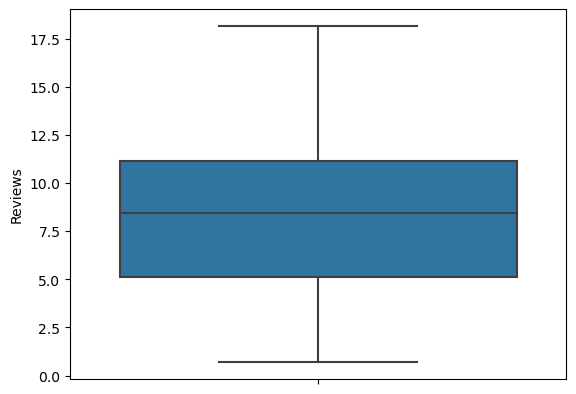

In [32]:
sns.boxplot(y=df['Reviews'])
#checking whether the above step runned successfully using another box plot

<font size=4> Q9)The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into
suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where
size='Varies with device')

In [33]:
df['Size'].unique()
# Using unique checking for alphanumeric values

array(['19M', '14M', '8.7M', ..., '552k', '582k', '619k'], dtype=object)

In [34]:
df =df[df['Size']!='Varies with device']
#Here we are droping the entries where size='Varies with device' 

In [35]:
#creating evaluate function to add or subtract or multiply it is Mathematical function
def evaluate(x):
    if type(x) is str:
        return eval(x)
    else:
        return x

In [36]:
#running the above function 
df['Size']=df['Size'].str.replace('M','*1000000').str.replace('k','*1000').apply(eval)

In [37]:
df['Size']
#The above mentioned column is converted from alpha numeric to string 

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10833      619000.0
10834     2600000.0
10836    53000000.0
10837     3600000.0
10840    19000000.0
Name: Size, Length: 7424, dtype: float64

In [38]:
df['Size']=df['Size'].astype(int)
#Converting Size as int from float

In [39]:
df['Size'].dtypes
#checking whether the above step runned successfully

dtype('int32')

<font size=4> Q10)Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type

In [40]:
df['Installs']
#checking for unwanted character

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10833         1,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7424, dtype: object

In [41]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [42]:
df['Installs'] = df['Installs'].str.replace('+','').str.replace(',','').str.replace('Free','0').astype(int)
#Converting Installs as Float as int

In [43]:
df['Installs']
#df['Installs'] converted into int

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7424, dtype: int32

<font size=4> Q11)Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type

In [44]:
df['Price'].unique()
#Checking 'Price' type and converting it intyo proper numeric int or float by removeing unwanted characters


array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [45]:
df['Price'] = df['Price'].str.replace('$','').astype(float)
#replacing the non numeric term using replace 

In [46]:
df['Price'].unique()
#checking whether the above step runned successfully

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

<font size=4> Q12)Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we
created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated',
'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [47]:
#droping unwanted columns
df.drop(['Rating','Genres'],axis=1,inplace=True)
#Rating Column has been created new with 'Rating_category'hence droping Rating and Genres  and category are same hence droping Genres column

In [48]:
df.drop(['App','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [49]:
df.head(2)
#unwanted columns are dropped successfully

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.075174,19000000,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,6.875232,14000000,500000,Free,0.0,Everyone,High


<font size=4> Q13) Encode the categorical columns.


In [50]:
df.dtypes
#checking for the categorical columns

Category            object
Reviews            float64
Size                 int32
Installs             int32
Type                object
Price              float64
Content Rating      object
Rating_category     object
dtype: object

In [51]:
from sklearn.preprocessing import LabelEncoder
label_encode=LabelEncoder()
df['Category']=label_encode.fit_transform(df['Category'])
#converting category column into integer

In [52]:
df=pd.get_dummies(df,columns=['Type'])
#converting Type column into integer

In [53]:
df=pd.get_dummies(df,columns=['Content Rating'])
#converting Content Rating column into integer

In [54]:
df['Rating_category']=label_encode.fit_transform(df['Rating_category'])#converting Rating_category column into integer

In [55]:
df.dtypes
# all columns are converted to numeric 

Category                            int32
Reviews                           float64
Size                                int32
Installs                            int32
Price                             float64
Rating_category                     int32
Type_Free                           uint8
Type_Paid                           uint8
Content Rating_Adults only 18+      uint8
Content Rating_Everyone             uint8
Content Rating_Everyone 10+         uint8
Content Rating_Mature 17+           uint8
Content Rating_Teen                 uint8
Content Rating_Unrated              uint8
dtype: object

<font size=4> Q14)Segregate the target and independent features (Hint: Use Rating_category as the target)

In [56]:
X=df.drop('Rating_category',axis=1)
y=df['Rating_category']
#Here we are separating target and independent variable

<font size=4> Q15)Split the dataset into train and test.

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

<font size=4> Q16)Standardize the data, so that the values are within a particular range.


In [59]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale=MinMaxScaler()
X_train.iloc[:,0:5]=minmax_scale.fit_transform(X_train.iloc[:,0:5])